# Chapter 7 - Minimum, Maximum, and Mixture
http://allendowney.github.io/ThinkBayes2/chap07.html

## Reading

### CDF

In [1]:
import numpy as np
from empiricaldist import Pmf

hypos = np.linspace(0, 1, 101)
pmf = Pmf(1, hypos)
data = 140, 250

In [2]:
from scipy.stats import binom

def update_binomial(pmf, data):
    """Update pmf using the binomial distribution."""
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [3]:
update_binomial(pmf, data)

In [4]:
cumulative = pmf.cumsum()

In [5]:
from utils import decorate

def decorate_euro(title):
    decorate(xlabel='Proportion of heads (x)',
             ylabel='Probability',
             title=title)

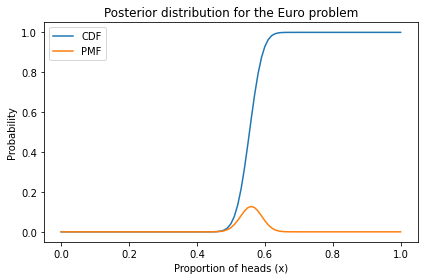

In [6]:
cumulative.plot(label='CDF')
pmf.plot(label='PMF')
decorate_euro(title='Posterior distribution for the Euro problem')

In [7]:
cumulative[0.61]

0.9638303193984252

In [8]:
from scipy.interpolate import interp1d

ps = cumulative.values
qs = cumulative.index

interp = interp1d(ps, qs)
interp(0.96)

array(0.60890171)

In [9]:
cdf = pmf.make_cdf()

In [10]:
cdf[0.61]

0.9638303193984252

In [11]:
cdf(0.615)

array(0.96383032)

In [12]:
cdf.credible_interval(0.9)

array([0.51, 0.61])

### Best Three of Four

In [13]:
from utils import make_die
from utils import add_dist_seq

die = make_die(6)
dice = [die] * 3

pmf_3d6 = add_dist_seq(dice)

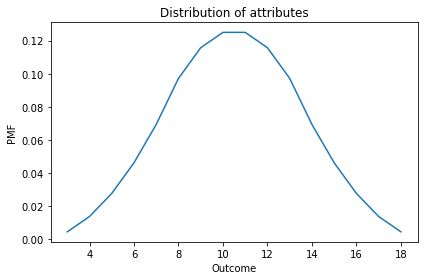

In [14]:
def decorate_dice(title=''):
    decorate(xlabel='Outcome',
             ylabel='PMF',
             title=title)
    
pmf_3d6.plot()
decorate_dice('Distribution of attributes')

Simulate best three out of 4:

In [15]:
n = 10000
a = np.random.randint(1, 7, size=(n, 4))

In [17]:
a

array([[3, 3, 4, 1],
       [2, 3, 6, 1],
       [4, 4, 4, 4],
       ...,
       [1, 6, 1, 1],
       [6, 5, 6, 5],
       [4, 2, 4, 3]])

In [18]:
a.sort(axis=1)
a

array([[1, 3, 3, 4],
       [1, 2, 3, 6],
       [4, 4, 4, 4],
       ...,
       [1, 1, 1, 6],
       [5, 5, 6, 6],
       [2, 3, 4, 4]])

In [19]:
t = a[:, 1:].sum(axis=1)

In [20]:
pmf_best3 = Pmf.from_seq(t)

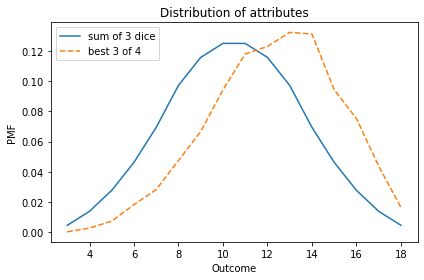

In [21]:
pmf_3d6.plot(label='sum of 3 dice')
pmf_best3.plot(label='best 3 of 4', style='--')

decorate_dice('Distribution of attributes')

### Maximum

In [22]:
cdf_best3 = pmf_best3.make_cdf()

In [23]:
from empiricaldist import Cdf

cdf_max6 = Cdf(cdf_best3**6)

In [24]:
pmf_max6 = cdf_max6.make_pmf()

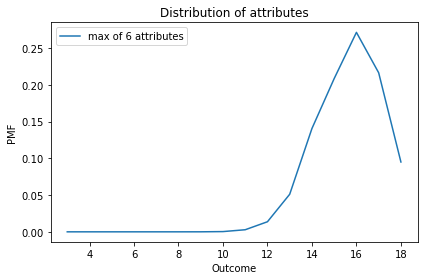

In [25]:
pmf_max6.plot(label='max of 6 attributes')

decorate_dice('Distribution of attributes')

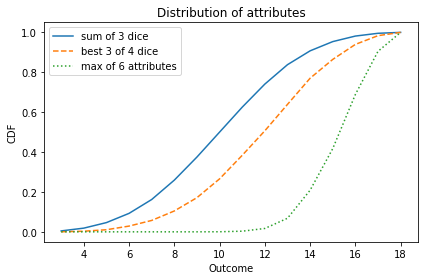

In [26]:
import matplotlib.pyplot as plt

cdf_3d6 = pmf_3d6.make_cdf()
cdf_3d6.plot(label='sum of 3 dice')

cdf_best3 = pmf_best3.make_cdf()
cdf_best3.plot(label='best 3 of 4 dice', style='--')

cdf_max6.plot(label='max of 6 attributes', style=':')

decorate_dice('Distribution of attributes')
plt.ylabel('CDF');

In [27]:
cdf_max_dist6 = cdf_best3.max_dist(6)

In [28]:
cdf_best3.max_dist?

Signature: cdf_best3.max_dist(n)
Docstring:
Distribution of the maximum of `n` values from this distribution.

n: integer

:return: Cdf
File:      ~/opt/anaconda3/lib/python3.9/site-packages/empiricaldist/empiricaldist.py
Type:      method


### Minimum

In [31]:
prob_gt = 1 - cdf_best3

Complementary CDF: probability that a value from the distribution is greater than `x`.

In [32]:
prob_gt6 = prob_gt**6

`prob_gt6` is the probability that all 6 values drawn from the distribution are greater than `x`. If all 6 values exceed `x`, then their minimum exceeds `x`. So, `prob_gt6` is the complementary CDF of the minimum.

In [33]:
prob_le6 = 1 - prob_gt6

In [34]:
cdf_min6 = Cdf(prob_le6)

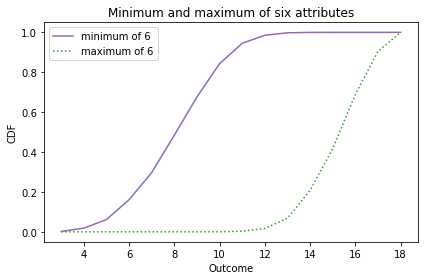

In [35]:
cdf_min6.plot(color='C4', label='minimum of 6')
cdf_max6.plot(color='C2', label='maximum of 6', style=':')
decorate_dice('Minimum and maximum of six attributes')
plt.ylabel('CDF');

In [36]:
cdf_min_dist6 = cdf_best3.min_dist(6)

### Mixture

In [37]:
d4 = make_die(4)
d6 = make_die(6)

In [38]:
prob_1 = (d4(1) + d6(1)) / 2
prob_1

0.20833333333333331

In [39]:
prob_6 = (d4(6) + d6(6)) / 2
prob_6

0.08333333333333333

In [40]:
mix1 = (d4 + d6) / 2

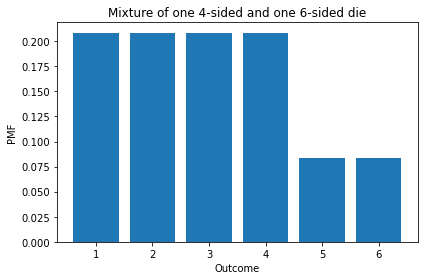

In [41]:
mix1.bar()
decorate_dice('Mixture of one 4-sided and one 6-sided die')

In [42]:
mix2 = (d4 + 2 * d6) / 3

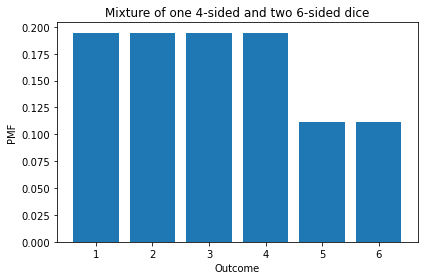

In [43]:
mix2.bar()
decorate_dice('Mixture of one 4-sided and two 6-sided dice')

In [44]:
total_damage = Pmf.add_dist(mix1, mix2)

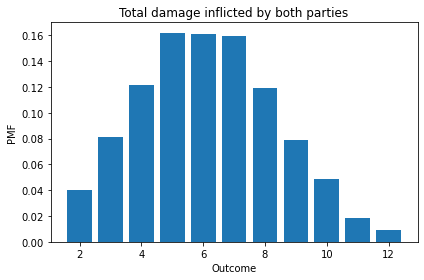

In [45]:
total_damage.bar()
decorate_dice('Total damage inflicted by both parties')

### General mixtures

In [46]:
hypos = [4, 6, 8]
counts = [1, 2, 3]
pmf_dice = Pmf(counts, hypos)
pmf_dice.normalize()
pmf_dice

,probs
4,0.166667
6,0.333333
8,0.500000


In [47]:
dice = [make_die(sides) for sides in hypos]

In [48]:
import pandas as pd

pd.DataFrame(dice)

,1,2,3,4,5,6,7,8
,0.250000,0.250000,0.250000,0.250000,NaN,NaN,NaN,NaN
,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,NaN,NaN
,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125,0.125


In [49]:
df = pd.DataFrame(dice).fillna(0).transpose()

In [50]:
df

,,,
1,0.25,0.166667,0.125
2,0.25,0.166667,0.125
3,0.25,0.166667,0.125
4,0.25,0.166667,0.125
5,0.00,0.166667,0.125
6,0.00,0.166667,0.125
7,0.00,0.000000,0.125
8,0.00,0.000000,0.125


In [51]:
df *= pmf_dice.ps
df

,,,
1,0.041667,0.055556,0.0625
2,0.041667,0.055556,0.0625
3,0.041667,0.055556,0.0625
4,0.041667,0.055556,0.0625
5,0.000000,0.055556,0.0625
6,0.000000,0.055556,0.0625
7,0.000000,0.000000,0.0625
8,0.000000,0.000000,0.0625


In [52]:
df.sum(axis=1)

1    0.159722
2    0.159722
3    0.159722
4    0.159722
5    0.118056
6    0.118056
7    0.062500
8    0.062500
dtype: float64

In [53]:
def make_mixture(pmf, pmf_seq):
    """Make a mixture of distributions."""
    df = pd.DataFrame(pmf_seq).fillna(0).transpose()
    df *= np.array(pmf)
    total = df.sum(axis=1)
    return Pmf(total)

In [54]:
mix = make_mixture(pmf_dice, dice)

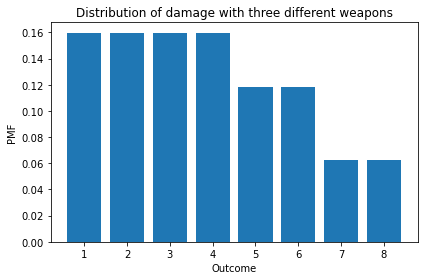

In [55]:
mix.bar()
decorate_dice('Distribution of damage with three different weapons')

## Exercises

**Exercise:** When you generate a D&D character, instead of rolling dice, you can use the "standard array" of attributes, which is 15, 14, 13, 12, 10, and 8.
Do you think you are better off using the standard array or (literally) rolling the dice?

Compare the distribution of the values in the standard array to the distribution we computed for the best three out of four:

* Which distribution has higher mean?  Use the `mean` method.

* Which distribution has higher standard deviation?  Use the `std` method.

* The lowest value in the standard array is 8.  For each attribute, what is the probability of getting a value less than 8?  If you roll the dice six times, what's the probability that at least one of your attributes is less than 8?

* The highest value in the standard array is 15.  For each attribute, what is the probability of getting a value greater than 15?  If you roll the dice six times, what's the probability that at least one of your attributes is greater than 15?

In [56]:
standard = [15,14,13,12,10,8]
cdf_standard = Cdf.from_seq(standard)

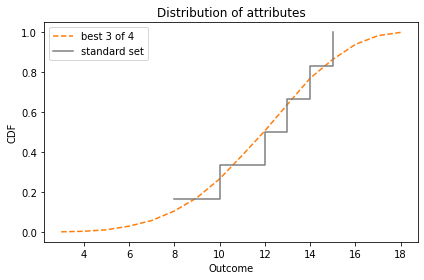

In [57]:
cdf_best3.plot(label='best 3 of 4', color='C1', ls='--')
cdf_standard.step(label='standard set', color='C7')

decorate_dice('Distribution of attributes')
plt.ylabel('CDF');

In [59]:
cdf_standard.mean(), cdf_best3.mean()

(12.0, 12.271899999999995)

In [60]:
cdf_standard.std(), cdf_best3.std()

(2.3804761428476167, 2.84843297095087)

In [61]:
cdf_standard.prob_lt(8), cdf_best3.prob_lt(8)

(0.0, 0.0571)

In [62]:
cdf_standard.prob_gt(15), cdf_best3.prob_gt(15)

(0.0, 0.13559999999999994)

**Exercise:** Suppose you are fighting three monsters:

* One is armed with a short sword that causes one 6-sided die of damage,

* One is armed with a battle axe that causes one 8-sided die of damage, and

* One is armed with a bastard sword that causes one 10-sided die of damage.

One of the monsters, chosen at random, attacks you and does 1 point of damage.

Which monster do you think it was?  Compute the posterior probability that each monster was the attacker.

If the same monster attacks you again, what is the probability that you suffer 6 points of damage?

Hint: Compute a posterior distribution as we have done before and pass it as one of the arguments to `make_mixture`.

In [66]:
hypos = [6, 8, 10]
prior = Pmf(1, hypos)
prior.normalize()
prior

,probs
6,0.333333
8,0.333333
10,0.333333


In [75]:
likelihoods = [1 / sides for sides in hypos]

posterior = prior * likelihoods
posterior.normalize()
posterior

,probs
6,0.425532
8,0.319149
10,0.255319


In [77]:
dice = [make_die(sides) for sides in hypos]

In [78]:
mix = make_mixture(posterior, dice)
mix

,probs
1,0.136348
2,0.136348
3,0.136348
4,0.136348
5,0.136348
6,0.136348
7,0.065426
8,0.065426
9,0.025532
10,0.025532


In [79]:
mix[6]

0.13634751773049647

**Exercise:** Henri Poincaré was a French mathematician who taught at the Sorbonne around 1900. The following anecdote about him is probably fiction, but it makes an interesting probability problem.

Supposedly Poincaré suspected that his local bakery was selling loaves of bread that were lighter than the advertised weight of 1 kg, so every day for a year he bought a loaf of bread, brought it home and weighed it. At the end of the year, he plotted the distribution of his measurements and showed that it fit a normal distribution with mean 950 g and standard deviation 50 g. He brought this evidence to the bread police, who gave the baker a warning.

For the next year, Poincaré continued to weigh his bread every day. At the end of the year, he found that the average weight was 1000 g, just as it should be, but again he complained to the bread police, and this time they fined the baker.

Why? Because the shape of the new distribution was asymmetric. Unlike the normal distribution, it was skewed to the right, which is consistent with the hypothesis that the baker was still making 950 g loaves, but deliberately giving Poincaré the heavier ones.

To see whether this anecdote is plausible, let's suppose that when the baker sees Poincaré coming, he hefts `n` loaves of bread and gives Poincaré the heaviest one.  How many loaves would the baker have to heft to make the average of the maximum 1000 g?

In [80]:
mean = 950
std = 50

np.random.seed(17)
sample = np.random.normal(mean, std, size=365)

<AxesSubplot:>

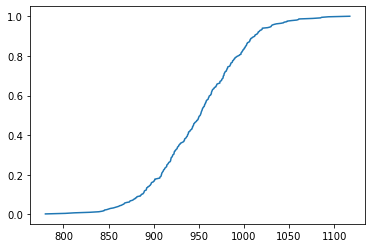

In [83]:
cdf_normal = Cdf.from_seq(sample)
cdf_normal.plot()

In [84]:
means = []
for n in np.arange(1, 20):
    cdf_maxn = Cdf(cdf_normal ** n)
    means.append(cdf_maxn.mean())

In [98]:
means

[949.7832346541664,
 978.4666876067706,
 992.7589004318227,
 1002.0372868686195,
 1008.8226939493089,
 1014.142390301017,
 1018.507694202546,
 1022.2066965318894,
 1025.416321307913,
 1028.2523518388548,
 1030.7943386611728,
 1033.099078721034,
 1035.2084073711762,
 1037.1539489230536,
 1038.9601414428,
 1040.6462330404067,
 1042.2276395644556,
 1043.7168919083267,
 1045.124311756085]

4 loaves is enough.

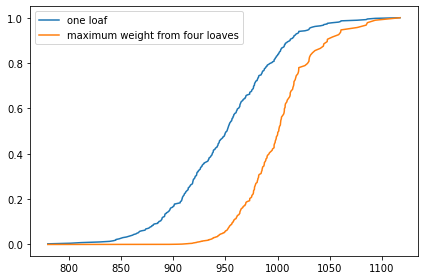

In [103]:
cdf_normal.plot(label='one loaf')
cdf_max = Cdf(cdf_normal**4)
cdf_max.plot(label='maximum weight from four loaves')
decorate()